# Classification of Reviews Using BiLSTM

In this notebook, I will be classifying the reviews by analysing the sentiment of the reviews using BiLSTM network.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [4]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

In [5]:
from tensorflow import keras

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
pip install mlxtend

In [8]:
from mlxtend.plotting import plot_confusion_matrix

In [11]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Capstone_project/data/reviews_preprocessed.csv',dtype='unicode',usecols = ['reviewerID','product_id','ratings','reviewcomb','ratings','clean_text'])

In [12]:
df.head()

,reviewerID,product_id,ratings,reviewcomb,clean_text
0,A11LNPG39A2ZV4,B00063M3EC,5,"I've been using&nbsp;<a data-hook=""product-lin...",use marvi classic strong mint toothpast year r...
1,A1VUN4JU731CBH,B00063M3EC,5,I had seen the Marvis toothpastes before and a...,seen marvi toothpast alway wonder world anyon ...
2,A2CBVSJ1OV2Q4S,B00063M3EC,5,I buy the Jasmine Marvis Toothpaste because it...,buy jasmin marvi toothpast uniqu floral scent ...
3,A34XM0ECYBB4DH,B00063M3EC,5,This toothpaste is the best I've ever tried. ...,toothpast best ever tri tast realli good light...
4,A2PMRY7ADA8WJ2,B00063M3EC,5,i didn't know what i was missing until i tried...,know miss tri toothpast make other tast artifi...


In [13]:
df.shape

(547894, 5)

In [14]:
df.isnull().sum()

reviewerID     0
product_id     0
ratings        0
reviewcomb     0
clean_text    20
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df['ratings'] = df['ratings'].astype(float)

In [17]:
df['Sentiment_rating']=np.where(df.ratings>3,1,0)

df = df[df.ratings !=3]

df['Sentiment_rating'].value_counts(normalize=True)

1    0.849866
0    0.150134
Name: Sentiment_rating, dtype: float64

In [18]:
df.head()

,reviewerID,product_id,ratings,reviewcomb,clean_text,Sentiment_rating
0,A11LNPG39A2ZV4,B00063M3EC,5.0,"I've been using&nbsp;<a data-hook=""product-lin...",use marvi classic strong mint toothpast year r...,1
1,A1VUN4JU731CBH,B00063M3EC,5.0,I had seen the Marvis toothpastes before and a...,seen marvi toothpast alway wonder world anyon ...,1
2,A2CBVSJ1OV2Q4S,B00063M3EC,5.0,I buy the Jasmine Marvis Toothpaste because it...,buy jasmin marvi toothpast uniqu floral scent ...,1
3,A34XM0ECYBB4DH,B00063M3EC,5.0,This toothpaste is the best I've ever tried. ...,toothpast best ever tri tast realli good light...,1
4,A2PMRY7ADA8WJ2,B00063M3EC,5.0,i didn't know what i was missing until i tried...,know miss tri toothpast make other tast artifi...,1


In [19]:
df_orig = df.copy()

In [ ]:
# df = df.head(200000)

In [20]:
X = df[['clean_text']]
y=df['Sentiment_rating']

In [21]:
X.shape

(507759, 1)

In [22]:
X

,clean_text
0,use marvi classic strong mint toothpast year r...
1,seen marvi toothpast alway wonder world anyon ...
2,buy jasmin marvi toothpast uniqu floral scent ...
3,toothpast best ever tri tast realli good light...
4,know miss tri toothpast make other tast artifi...
...,...
547888,cnd shellac power polish wonder color brick kn...
547889,colour dark two star
547891,great product perfect shade love deep red color
547892,perfum good spray head broke spray head broke ...


In [23]:
y.shape

(507759,)

# One hot encoding

In [24]:
### Vocabulary size
vocab_size=5000

In [25]:
messages=X.copy()

In [26]:
messages['clean_text']

0         use marvi classic strong mint toothpast year r...
1         seen marvi toothpast alway wonder world anyon ...
2         buy jasmin marvi toothpast uniqu floral scent ...
3         toothpast best ever tri tast realli good light...
4         know miss tri toothpast make other tast artifi...
                                ...                        
547888    cnd shellac power polish wonder color brick kn...
547889                                 colour dark two star
547891      great product perfect shade love deep red color
547892    perfum good spray head broke spray head broke ...
547893                             great fragranc five star
Name: clean_text, Length: 507759, dtype: object

In [27]:
messages.reset_index(inplace=True)

In [28]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
corpus = []
for words in messages['clean_text']:
  corpus.append(words)

In [ ]:

# for words in messages['clean_text']:
#     if type(words) is float:
#       print(words)  

In [30]:
onehot_repr=[one_hot(words,vocab_size)for words in corpus] 
onehot_repr

[[363,
  526,
  1642,
  3044,
  1265,
  2762,
  1033,
  1202,
  1450,
  2867,
  4478,
  4936,
  4666,
  365,
  292,
  2125,
  1265,
  707,
  1382,
  2125,
  2585,
  2750,
  4044,
  1202,
  2168,
  1297,
  1265,
  3152,
  845,
  347,
  3174,
  2975,
  3489,
  4287,
  2496,
  1704,
  4385,
  4149,
  3379,
  3550,
  3142,
  1382,
  707,
  3515,
  2585,
  3624,
  526,
  656,
  2300,
  2762,
  3717,
  363,
  3012,
  1450,
  526],
 [644,
  526,
  2762,
  2727,
  2467,
  625,
  2975,
  3152,
  4479,
  1569,
  3130,
  2762,
  3015,
  4624,
  2640,
  4446,
  4449,
  2238,
  8,
  3550,
  4728,
  526,
  1642,
  3044,
  1265,
  2762,
  4636,
  1799,
  511,
  2346,
  4375,
  4376,
  2605,
  2300,
  2762,
  1275,
  4033,
  99,
  1450,
  3044,
  1265,
  707,
  4042,
  1636,
  4844,
  2262,
  3250,
  4112,
  4586,
  4275,
  526,
  2346,
  2125,
  1265,
  707,
  2873,
  1816,
  4624,
  3385,
  1004,
  915,
  10,
  193,
  153,
  193,
  2048,
  3276,
  4044,
  2215,
  1020,
  4242,
  3559,
  4558,
  1942

In [31]:
sentence_length=200 #100
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sentence_length)
print(embedded_docs)

[[ 363  526 1642 ...    0    0    0]
 [ 644  526 2762 ...    0    0    0]
 [2058 2125  526 ...    0    0    0]
 ...
 [1942 3894  913 ...    0    0    0]
 [1654  181 3831 ...    0    0    0]
 [1942 2940 2485 ...    0    0    0]]


In [32]:
embedded_docs[0]

array([ 363,  526, 1642, 3044, 1265, 2762, 1033, 1202, 1450, 2867, 4478,
       4936, 4666,  365,  292, 2125, 1265,  707, 1382, 2125, 2585, 2750,
       4044, 1202, 2168, 1297, 1265, 3152,  845,  347, 3174, 2975, 3489,
       4287, 2496, 1704, 4385, 4149, 3379, 3550, 3142, 1382,  707, 3515,
       2585, 3624,  526,  656, 2300, 2762, 3717,  363, 3012, 1450,  526,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
# ## Creating model
# embedding_vector_features=40
# model=Sequential()
# model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(LSTM(100))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# print(model.summary())

In [33]:
## Creating model
embedding_vector_features=100

model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sentence_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)
# optimizer.learning_rate.assign(0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 661,001
Trainable params: 661,001
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
len(embedded_docs),y.shape

(507759, (507759,))

In [35]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [36]:
X_final.shape,y_final.shape

((507759, 200), (507759,))

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2,stratify =y_final, random_state=42)

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.1)

In [ ]:
# early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 5)

In [39]:
### Train model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
6347/6347 [==============================] - 201s 32ms/step - loss: 0.1486 - accuracy: 0.9425 - val_loss: 0.1255 - val_accuracy: 0.9507
Epoch 2/10
6347/6347 [==============================] - 200s 32ms/step - loss: 0.1156 - accuracy: 0.9553 - val_loss: 0.1145 - val_accuracy: 0.9549
Epoch 3/10
6347/6347 [==============================] - 201s 32ms/step - loss: 0.1015 - accuracy: 0.9608 - val_loss: 0.1167 - val_accuracy: 0.9566
Epoch 4/10
6347/6347 [==============================] - 201s 32ms/step - loss: 0.0899 - accuracy: 0.9654 - val_loss: 0.1114 - val_accuracy: 0.9582
Epoch 5/10
6347/6347 [==============================] - 200s 32ms/step - loss: 0.0790 - accuracy: 0.9702 - val_loss: 0.1121 - val_accuracy: 0.9583
Epoch 6/10
6347/6347 [==============================] - 201s 32ms/step - loss: 0.0682 - accuracy: 0.9745 - val_loss: 0.1187 - val_accuracy: 0.9584
Epoch 7/10
6347/6347 [==============================] - 200s 32ms/step - loss: 0.0579 - accuracy: 0.9786 - val_loss: 0

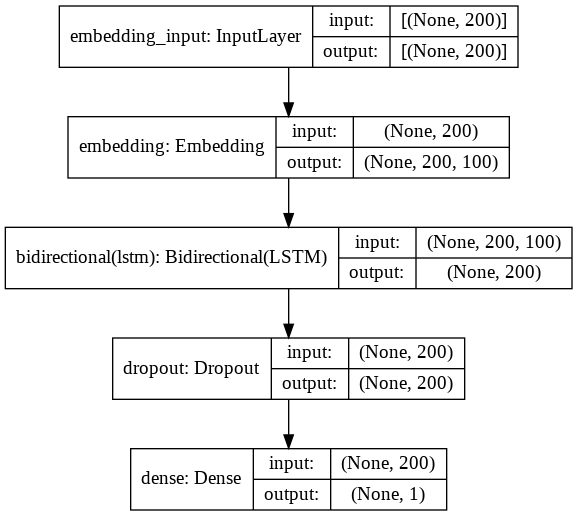

In [40]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [41]:
y_pred=(model.predict(X_test)> 0.5).astype("int32")

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,y_pred)

array([[12762,  2484],
       [ 1981, 84325]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9560323775011816

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     15246
           1       0.97      0.98      0.97     86306

    accuracy                           0.96    101552
   macro avg       0.92      0.91      0.91    101552
weighted avg       0.96      0.96      0.96    101552



In [46]:
history.history

{'accuracy': [0.9425169825553894,
  0.9552814364433289,
  0.9608352184295654,
  0.965416669845581,
  0.9702073335647583,
  0.9744514226913452,
  0.9786365032196045,
  0.9824966192245483,
  0.9858298897743225,
  0.9885969758033752],
 'loss': [0.14857639372348785,
  0.11556355655193329,
  0.1015307828783989,
  0.08993418514728546,
  0.07903042435646057,
  0.0681954026222229,
  0.05792458727955818,
  0.04829917103052139,
  0.03979279473423958,
  0.032791443169116974],
 'val_accuracy': [0.9506558179855347,
  0.9549294710159302,
  0.9565837979316711,
  0.9582282900810242,
  0.9583464860916138,
  0.9584055542945862,
  0.9574011564254761,
  0.957686722278595,
  0.9564065933227539,
  0.956032395362854],
 'val_loss': [0.12552422285079956,
  0.11447608470916748,
  0.11671397089958191,
  0.11137744039297104,
  0.11212124675512314,
  0.11874402314424515,
  0.1269555240869522,
  0.14197415113449097,
  0.1555352658033371,
  0.16763721406459808]}

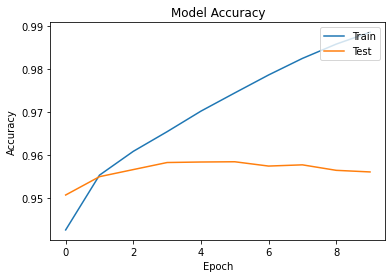

In [47]:
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Test accuracy')
plt.title("Model Accuracy")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()

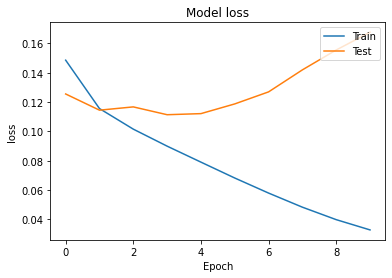

In [48]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Test loss')
plt.title("Model loss")

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()

In [49]:
import matplotlib as plt
plt.rcParams.update(plt.rcParamsDefault)

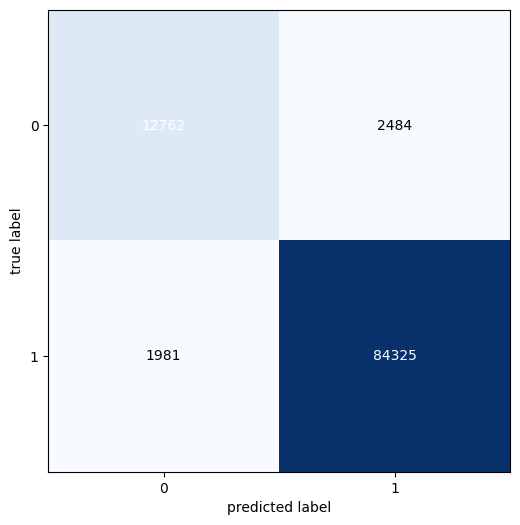

In [50]:
mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = mat, figsize = (6,6),  show_normed =False)

